## Mobile Price Classification
### Classify Mobile Price Range

* Link : https://www.kaggle.com/iabhishekofficial/mobile-price-classification

* Context  
    Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
    He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
    Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
    In this problem you do not have to predict actual price but a price range indicating how high the price is  

* Goal  
    * Object is to predict price range indicating how high the price is
    * Need to predict the selling price range of ID's in each test set

* Evaluation Metric
    * Evaluation by Root-Mean-Squared-Logged-Error (RMSLE), a Logged value on the difference between the predicted price and the actual selling price

    * The reason for using Log is to offset the high-priced cell phone's prediction result because it has a high proportion on the overall result.

* Submission File Format
    * Analyze Test Data Set with the final learned model and submit a sheet of Predicted Price Range for each ID

* Data Description
    * train.csv - the training set
    * test.csv - teh test set

  
* Feature Description
    * batter_power : Total energy a battery can store in one time measured in mAh
    * blue : Has bluetooth or not
    * clock_speed : speed at which microprocessor executes instructions
    * dual_sim : Has dual sim support or not
    * fc : Front Camera mega pixels
    * four_g : Has 4G or not
    * int_memory : Internal Memory in Gigabytes
    * m_dep : Mobile Depth in cm
    * mobile_wt : Weight of mobile phone
    * n_cores : Number of cores of processor
    * pc : Primary Camera mega pixels
    * px_height : Pixel Resolution Height
    * px_width : Pixel Resolution Width
    * ram : Random Access Memory in Megabytes
    * sc_h : Screen Height of mobile in cm
    * sc_w : Screen Width of mobile in cm
    * talk_time : longest time that a single battery charge will last when you are
    * three_g : Has 3G or not
    * touch_screen : Has touch screen or not
    * wifi : Has wifi or not
    * price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Import Package

In [553]:
#데이터 핸들링 관련 라이브러리
import pandas as pd
import numpy as np

#Visualize관련 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#통계 관련 라이브러리
from scipy import stats
from scipy.stats import norm, skew

#기타 라이브러리
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # Ignore annoying warning (from sklearn and seaborn)

In [554]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Data Preprocessing

### Checking Dataset & Drop Unnecessary Variable

* Index : 'ID'
    * Delete 'ID' acting as Index
* Target : 'Price_Range'
    * Target Variable 'Price_Range' exists in Train Data, not in Test Set

#### Train Dataset

In [555]:
train_df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [556]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [557]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Test Dataset

In [558]:
test_df.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [559]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [560]:
test_df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


* Drop 'ID' Variable and Checking Dataset Shape

In [561]:
# Save the 'id' column
test_ID = test_df['id']

# Drop the 'id column since it's unnecessary for the prediction process
test_df.drop("id", axis=1, inplace = True)

In [562]:
print("\nThe train data size : {} ".format(train_df.shape)) 
print("The test data size : {} ".format(test_df.shape))


The train data size : (2000, 21) 
The test data size : (1000, 20) 


 ### Target Variable

* Target Variable is categorical variable
* All target variable has same proportion in dataset

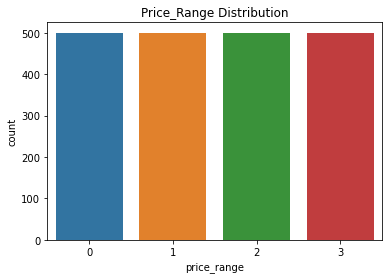

In [563]:
sns.countplot(data = train_df, x='price_range')
plt.title('Price_Range Distribution')
plt.show()

In [13]:
train_df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

### Features Engineering

#### Checking Missing Data

* There is no Missing Data

In [14]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
test_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

#### Data Correlation

* Checking correlation among features using heatmap graph
    * Battery_power, px_height, px_width, ram are highly correlated with price range

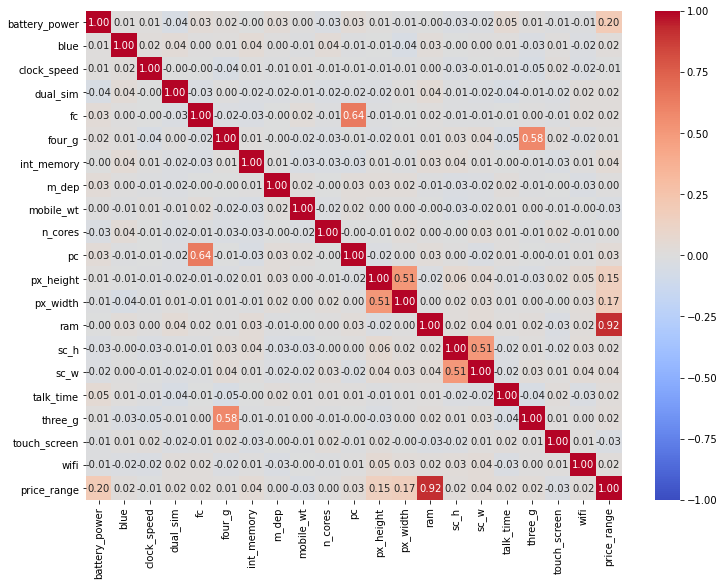

In [16]:
#Correlation map to see how features are correlated with Price_Range
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

#### All Feature  Trend

* Let's check the mean value trend of all features to see how it relates to price range
* Significant Trend : Battery Power, pc, ram, wifi

In [17]:
train_df.groupby(['price_range']).mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


#### battery Power
* Increasing price range, battery power also be increased

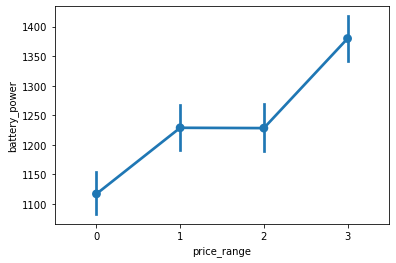

In [17]:
sns.pointplot(x='price_range',y='battery_power',data=train_df)

#### blue
* Can not see any trend in bluetooth

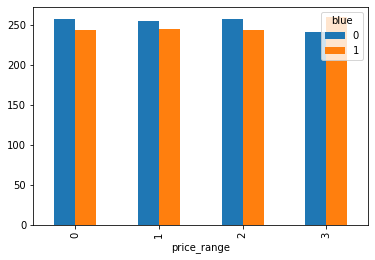

In [18]:
data = train_df.groupby(['blue', 'price_range'])['blue'].count().unstack(level=0)
data.plot(kind='bar')

#### clock Speed
* Can not see any trend in clock speed

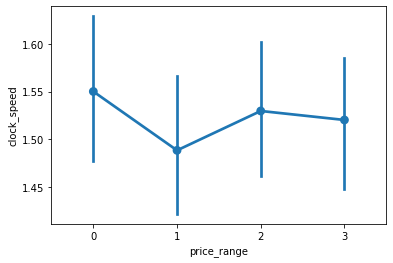

In [19]:
sns.pointplot(x='price_range',y='clock_speed',data=train_df)

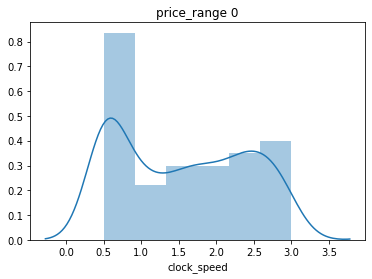

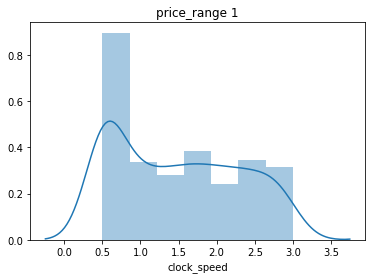

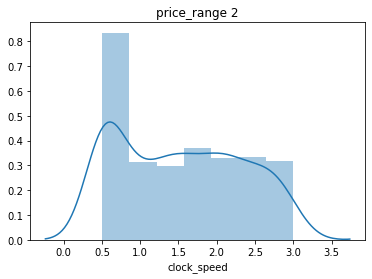

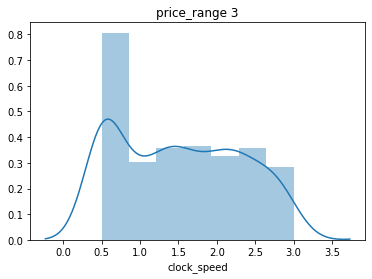

In [20]:
for i in range(0, 4):
    cp_df = train_df.loc[train_df['price_range']==i]
    sns.distplot(cp_df['clock_speed'])
    plt.title('price_range {}'.format(i))
    plt.show()

#### dual sim
* Can not see any trend in dual sim

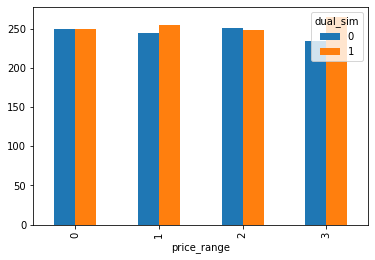

In [21]:
data = train_df.groupby(['dual_sim', 'price_range'])['dual_sim'].count().unstack(level=0)
data.plot(kind='bar')

#### fc
* Can not see any trend in fc

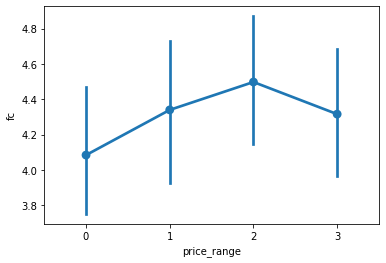

In [22]:
sns.pointplot(x='price_range',y='fc',data=train_df)

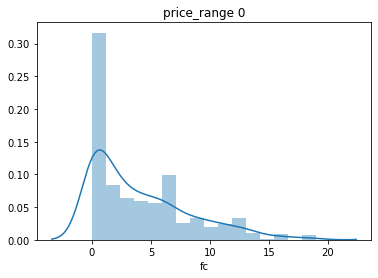

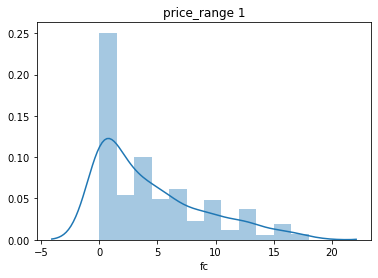

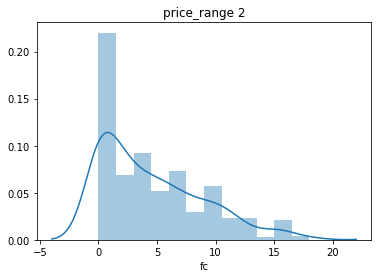

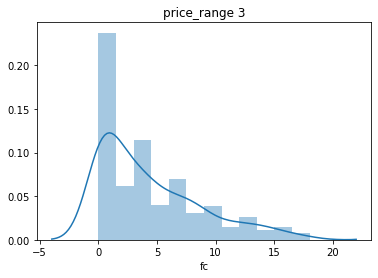

In [23]:
for i in range(0, 4):
    fc_df = train_df.loc[train_df['price_range']==i]
    sns.distplot(fc_df['fc'])
    plt.title('price_range {}'.format(i))
    plt.show()

#### four_g
* Can not see any trend in four_g

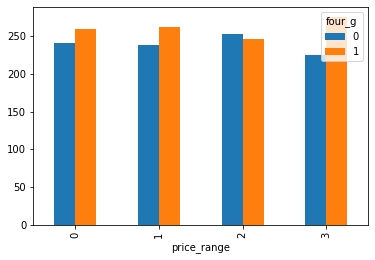

In [24]:
data = train_df.groupby(['four_g', 'price_range'])['four_g'].count().unstack(level=0)
data.plot(kind='bar')

#### int_memory
* Can not see any trend in int_memory

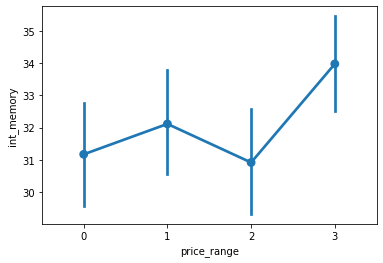

In [25]:
sns.pointplot(x='price_range',y='int_memory',data=train_df)

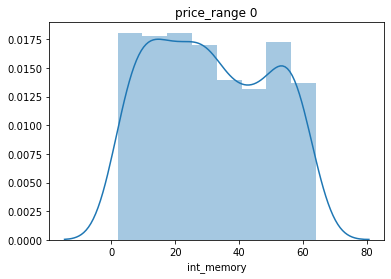

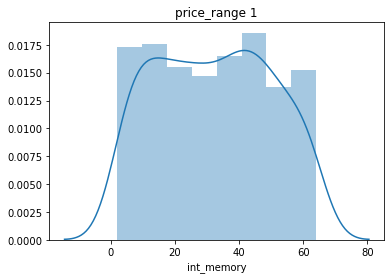

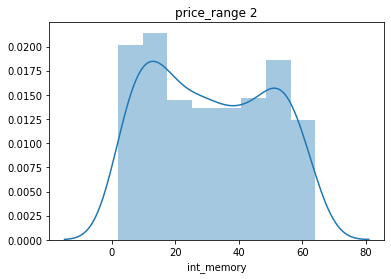

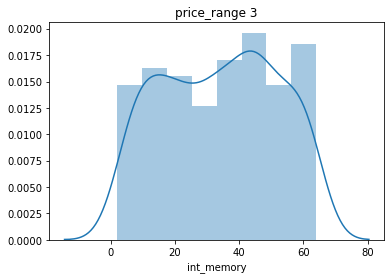

In [26]:
for i in range(0, 4):
    cp_df = train_df.loc[train_df['price_range']==i]
    sns.distplot(cp_df['int_memory'])
    plt.title('price_range {}'.format(i))
    plt.show()

#### m_dep
* Can not see any trend in m_dep

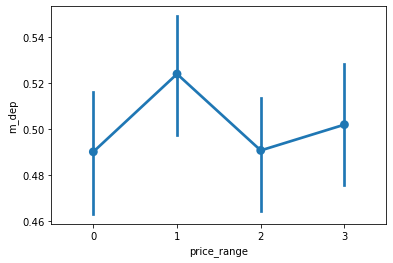

In [27]:
sns.pointplot(x='price_range',y='m_dep',data=train_df)

#### mobile_wt
* Can not see any trend in mobile_wt

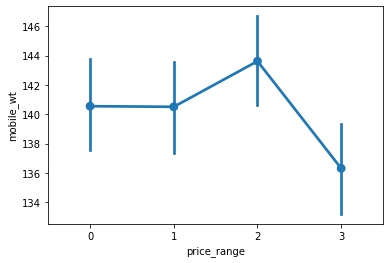

In [28]:
sns.pointplot(x='price_range',y='mobile_wt',data=train_df)

#### n_cores
* Can not see any trend in n_cores

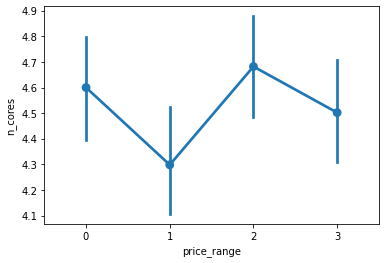

In [29]:
sns.pointplot(x='price_range',y='n_cores',data=train_df)

#### pc
* It looks like going right-uperside, it means that pc is related to price range.

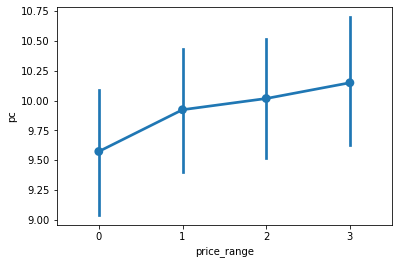

In [30]:
sns.pointplot(x='price_range',y='pc',data=train_df)

#### px_height
* It looks like going right-uperside, it means that px_height is related to price range.
* but it looks that there is some outlier in price range 2

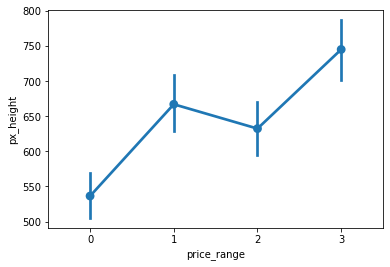

In [31]:
sns.pointplot(x='price_range',y='px_height',data=train_df)

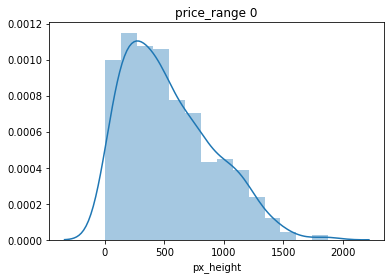

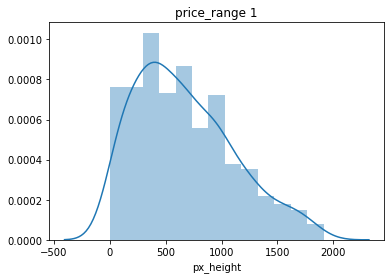

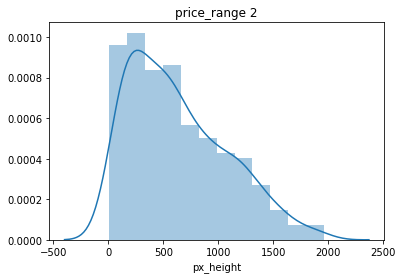

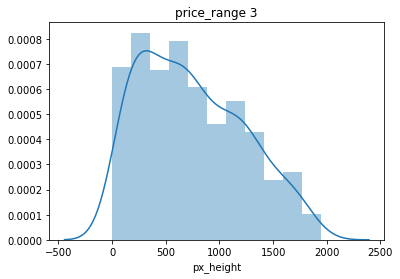

In [32]:
for i in range(0, 4):
    cp_df = train_df.loc[train_df['price_range']==i]
    sns.distplot(cp_df['px_height'])
    plt.title('price_range {}'.format(i))
    plt.show()

#### px_width
* It looks like going right-uperside, it means that px_width is related to price range.
* but it looks that there is some outlier in price range 2

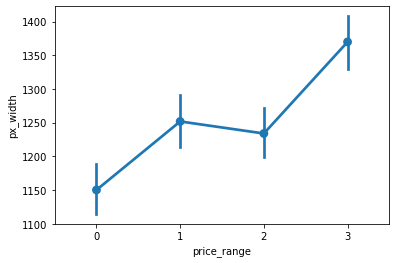

In [33]:
sns.pointplot(x='price_range',y='px_width',data=train_df)

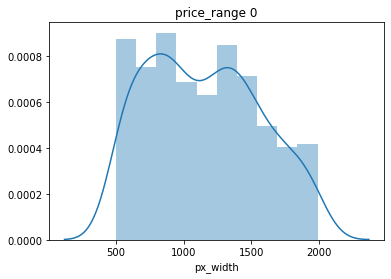

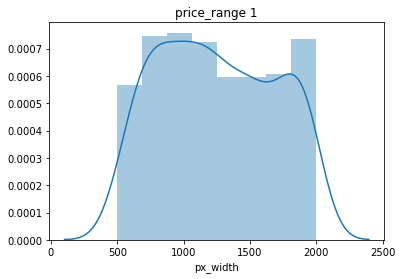

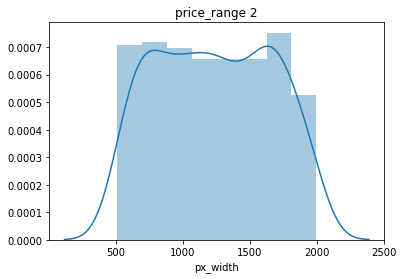

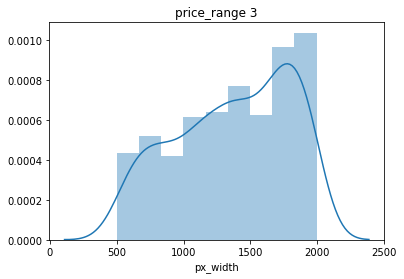

In [34]:
for i in range(0, 4):
    cp_df = train_df.loc[train_df['price_range']==i]
    sns.distplot(cp_df['px_width'])
    plt.title('price_range {}'.format(i))
    plt.show()

#### ram
* It looks like going right-uperside, it means that ram is related to price range.

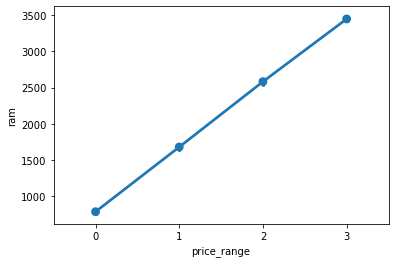

In [35]:
sns.pointplot(x='price_range',y='ram',data=train_df)

#### sc_h
* Can not see any trend in sc_h

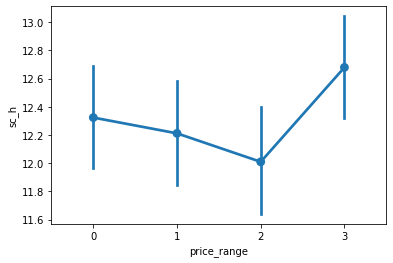

In [36]:
sns.pointplot(x='price_range',y='sc_h',data=train_df)

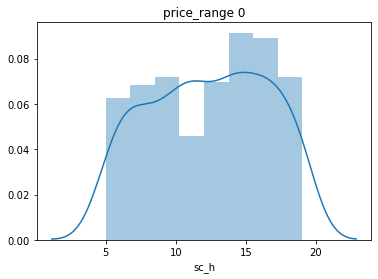

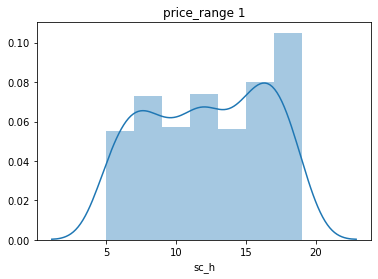

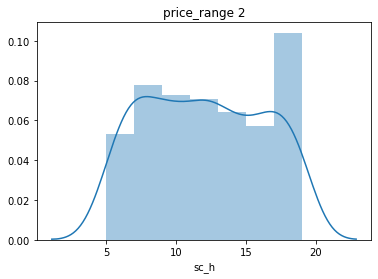

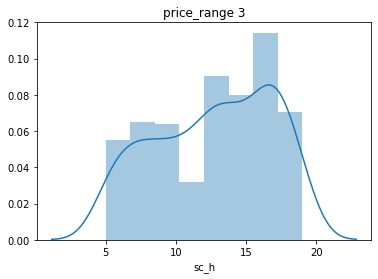

In [37]:
for i in range(0, 4):
    cp_df = train_df.loc[train_df['price_range']==i]
    sns.distplot(cp_df['sc_h'])
    plt.title('price_range {}'.format(i))
    plt.show()

#### sc_w
* Can not see any trend in sc_w

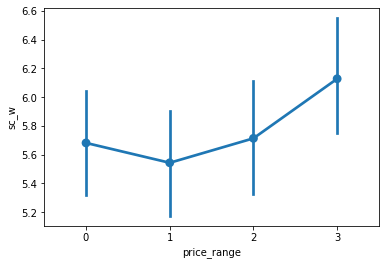

In [38]:
sns.pointplot(x='price_range',y='sc_w',data=train_df)

#### talk_time
* Can not see any trend in talk_time

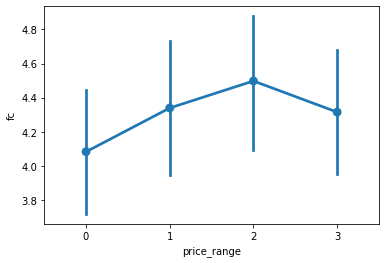

In [39]:
sns.pointplot(x='price_range',y='fc',data=train_df)

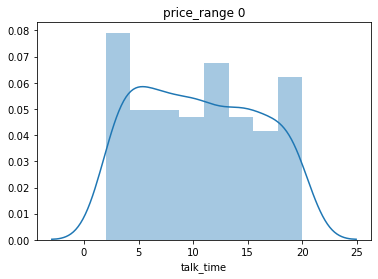

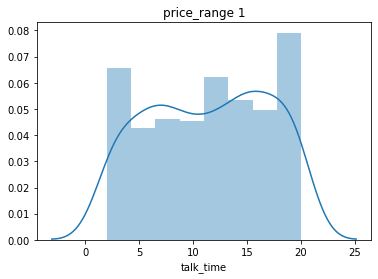

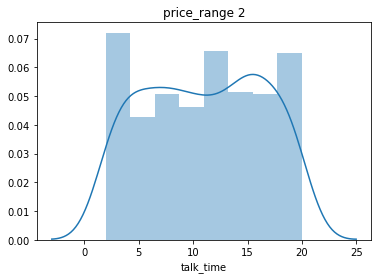

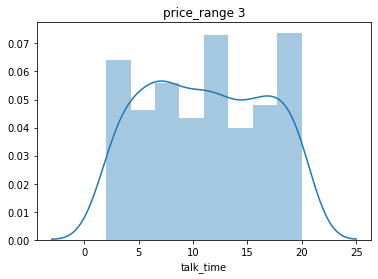

In [40]:
for i in range(0, 4):
    cp_df = train_df.loc[train_df['price_range']==i]
    sns.distplot(cp_df['talk_time'])
    plt.title('price_range {}'.format(i))
    plt.show()

#### three_g
* Can not see any trend in  three_g

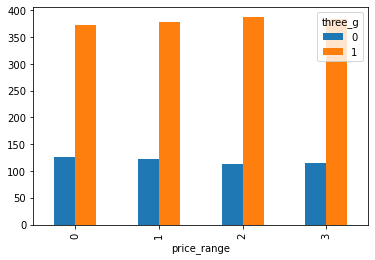

In [41]:
data = train_df.groupby(['three_g', 'price_range'])['three_g'].count().unstack(level=0)
data.plot(kind='bar')

#### touch_screen
* Can not see any trend in touch_screen

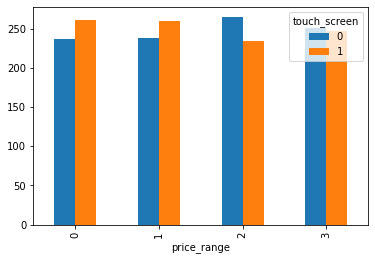

In [42]:
data = train_df.groupby(['touch_screen', 'price_range'])['touch_screen'].count().unstack(level=0)
data.plot(kind='bar')

#### wifi
* Can not see any trend in wifi

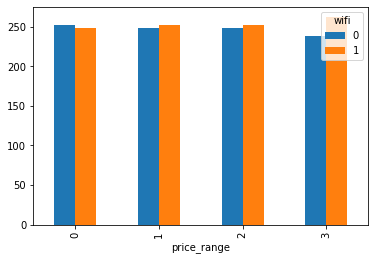

In [43]:
data = train_df.groupby(['wifi', 'price_range'])['wifi'].count().unstack(level=0)
data.plot(kind='bar')

## Modeling

### Import Packages

In [717]:
#모델링 관련 라이브러리

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score

### Data Split
* Split train dataset to x and y

In [569]:
y = train_df['price_range']
x = train_df.drop("price_range", axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123, stratify=y)

In [570]:
print("\nThe x_train data size : {} ".format(x_train.shape))
print("\nThe y_train data size : {} ".format(y_train.shape))
print("\nThe x_test data size : {} ".format(x_test.shape))
print("\nThe y_test data size : {} ".format(y_test.shape))


The x_train data size : (1500, 20) 

The y_train data size : (1500,) 

The x_test data size : (500, 20) 

The y_test data size : (500,) 


### Logistic Regression Model

In [571]:
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)

y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:64.26666666666667
Test Set Accuracy:63.0


### KNeighbors Model

In [675]:
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_test_pred1 = knn.predict(x_test)
y_train_pred1=knn.predict(x_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))

Train Set Accuracy:95.13333333333334
Test Set Accuracy:89.8


In [573]:
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_grid = GridSearchCV(knn, params_knn, cv=5)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [574]:
knn_grid.best_params_

{'n_neighbors': 9}

In [575]:
knn = knn_grid.best_estimator_

In [576]:
y_pred=knn.predict(x_test)

In [577]:
knn_train_acc = accuracy_score(y_train, knn.predict(x_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc*100}")
print(f"Test Accuracy of KNN Model is {knn_test_acc*100}")

Training Accuracy of KNN Model is 95.46666666666667
Test Accuracy of KNN Model is 91.0


### Support Vector Machine

In [578]:
svc = SVC()
svc.fit(x_train, y_train)

y_test_pred2 = svc.predict(x_test)
y_train_pred2= svc.predict(x_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))

Train Set Accuracy:94.93333333333334
Test Set Accuracy:94.0


In [646]:
param_svc = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             ]

svc_grid = GridSearchCV(estimator = svc,
                           param_grid = param_svc,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1
                       )

svc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.1s finished


GridSearchCV(cv=5, estimator=SVC(C=0.25, kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=1)

In [687]:
svc_grid.best_params_

{'C': 0.25, 'kernel': 'linear'}

In [688]:
svc = svc_grid.best_estimator_

In [689]:
y_pred=svc.predict(x_test)

In [650]:
svc_train_acc = accuracy_score(y_train, svc.predict(x_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc*100}")
print(f"Test Accuracy of SVC Model is {svc_test_acc*100}")

Training Accuracy of SVC Model is 99.6
Test Accuracy of SVC Model is 97.0


### Naive Bayes

In [584]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_test_pred3 = nb.predict(x_test)
y_train_pred3= nb.predict(x_train)

nb_acc=accuracy_score(y_test_pred3,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))

Train Set Accuracy:81.8
Test Set Accuracy:79.0


### Decision Tree Model

In [585]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_pred4 = dtc.predict(x_test)
y_train_pred4=dtc.predict(x_train)

dtc_acc=accuracy_score(y_test_pred4,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:82.39999999999999


In [586]:
# hyper parameter tuning

param_dtc = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

dtc_grid = GridSearchCV(dtc, param_dtc, cv = 5, n_jobs = -1, verbose = 1)
dtc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2146 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [587]:
dtc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [588]:
dtc = dtc_grid.best_estimator_

In [589]:
y_pred=dtc.predict(x_test)

In [590]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of DecisionTree Model is {dtc_train_acc*100}")
print(f"Test Accuracy of DecisionTree Model is {dtc_test_acc*100}")

Training Accuracy of DecisionTree Model is 95.39999999999999
Test Accuracy of DecisionTree Model is 85.0


### Random Forest

In [591]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_test_pred5 = rfc.predict(x_test)
y_train_pred5=rfc.predict(x_train)

rfc_acc=accuracy_score(y_test_pred5,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:86.8


In [592]:
# Grid Search 를 사용하여 최적의 Hyperparameter 찾기
params_rf = {
    'n_estimators': [50, 100, 200], 'max_depth':[100,250,500], 
    'max_features':[10,15,20]
}
rfc_grid = GridSearchCV(rfc, params_rf, cv=5)
rfc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 250, 500],
                         'max_features': [10, 15, 20],
                         'n_estimators': [50, 100, 200]})

In [593]:
rfc_grid.best_params_

{'max_depth': 100, 'max_features': 15, 'n_estimators': 100}

In [594]:
rfc = rfc_grid.best_estimator_

In [595]:
y_pred=rfc.predict(x_test)

In [596]:
rfc_train_acc = accuracy_score(y_train, rfc.predict(x_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rfc_train_acc*100}")
print(f"Test Accuracy of Random Forest Model is {rfc_test_acc*100}")

Training Accuracy of Random Forest Model is 100.0
Test Accuracy of Random Forest Model is 88.6


### Adaboost Model

In [597]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(x_train, y_train)

y_test_pred6 = ada.predict(x_test)
y_train_pred6= ada.predict(x_train)

ada_acc=accuracy_score(y_test_pred6,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:88.2


In [598]:
param_ada = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

ada_grid = GridSearchCV(ada, param_ada, n_jobs = -1, cv = 5, verbose = 1)
ada_grid.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   32.6s finished


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=7,
                                                                                min_samples_leaf=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [599]:
ada_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}

In [600]:
ada_grid.best_score_

0.9219999999999999

In [601]:
ada = ada_grid.best_estimator_

In [602]:
y_pred = ada.predict(x_test)

In [603]:
ada_train_acc = accuracy_score(y_train, ada.predict(x_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of AdaBoosting Model is {ada_train_acc*100}")
print(f"Test Accuracy of AdaBoosting Model is {ada_test_acc*100}")

Training Accuracy of AdaBoosting Model is 100.0
Test Accuracy of AdaBoosting Model is 91.8


### Gradientboost Model

In [604]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_test_pred7 = gbc.predict(x_test)
y_train_pred7=gbc.predict(x_train)

gbc_acc=accuracy_score(y_test_pred7,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred7,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred7,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:90.8


In [605]:
# Grid Search 를 사용하여 최적의 Hyperparameter 찾기
param_gbc = {
    'loss' : ["deviance"],
    'n_estimators' : [70, 90, 100],
    'learning_rate': [0.001,0.1,0.2,0.5],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2],
    'max_depth' : [3, 5]
    
}
gbc_grid = GridSearchCV(gbc,param_grid = param_gbc, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)
gbc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 0.2, 0.5],
                         'loss': ['deviance'], 'max_depth': [3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [70, 90, 100]},
             scoring='accuracy', verbose=1)

In [606]:
gbc_grid.best_params_

{'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 70}

In [607]:
gbc = gbc_grid.best_estimator_

In [608]:
y_pred=gbc.predict(x_test)

In [609]:
gbc_train_acc = accuracy_score(y_train, gbc.predict(x_train))
gbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradientboost Model is {gbc_train_acc*100}")
print(f"Test Accuracy of Gradientboost Model is {gbc_test_acc*100}")

Training Accuracy of Gradientboost Model is 100.0
Test Accuracy of Gradientboost Model is 90.4


### Light Gradientboost Model

In [610]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

y_test_pred8 = lgb.predict(x_test)
y_train_pred8=lgb.predict(x_train)

lgb_acc=accuracy_score(y_test_pred8,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred8,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred8,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:89.8


In [611]:
param_lgb = {
    'max_depth': [10, 15, 20],
    'min_child_samples': [20, 40, 60],
    'subsample': [0.8, 1]
}
lgb_grid = GridSearchCV(lgb,param_grid = param_lgb, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)
lgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.2s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_child_samples': [20, 40, 60],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [612]:
lgb_grid.best_params_

{'max_depth': 10, 'min_child_samples': 40, 'subsample': 0.8}

In [613]:
lgb = lgb_grid.best_estimator_

In [614]:
y_pred=lgb.predict(x_test)

In [615]:
lgb_train_acc = accuracy_score(y_train, lgb.predict(x_train))
lgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of LGB Model is {lgb_train_acc*100}")
print(f"Test Accuracy of LGB Model is {lgb_test_acc*100}")

Training Accuracy of LGB Model is 100.0
Test Accuracy of LGB Model is 90.0


### XGboost Model

In [616]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_test_pred9 = xgb.predict(x_test)
y_train_pred9= xgb.predict(x_train)

xgb_acc=accuracy_score(y_test_pred9,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred9,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred9,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:89.8


In [617]:
param_xgb = {
    'n_estimators' : [70, 90, 100, 120],
    'learning_rate': [0.001,0.1,0.2,0.5,0.75,1],
    'max_depth' : [3, 5, 10]
}
xgb_grid = GridSearchCV(xgb,param_grid = param_xgb, cv=5, scoring="accuracy", n_jobs= -1, verbose=1)
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.5s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                      

In [694]:
xgb_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 120}

In [695]:
xgb_grid.best_score_

0.9113333333333333

In [696]:
xgb = xgb_grid.best_estimator_
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [621]:
y_pred = xgb.predict(x_test)

In [622]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(x_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of XGboost Model is {xgb_train_acc*100}")
print(f"Test Accuracy of XGboost Model is {xgb_test_acc*100}")

Training Accuracy of XGboost Model is 100.0
Test Accuracy of XGboost Model is 91.8


### Catboost Model

In [623]:
cat = CatBoostClassifier()
cat.fit(x_train,y_train)

y_test_pred10 = cat.predict(x_test)
y_train_pred10= cat.predict(x_train)

cat_acc=accuracy_score(y_test_pred10,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred10,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred10,y_test)*100))

Learning rate set to 0.08078
0:	learn: 1.2778921	total: 5.37ms	remaining: 5.37s
1:	learn: 1.1785617	total: 9.13ms	remaining: 4.56s
2:	learn: 1.0997040	total: 12.4ms	remaining: 4.13s
3:	learn: 1.0340443	total: 15.8ms	remaining: 3.93s
4:	learn: 0.9768765	total: 19.2ms	remaining: 3.82s
5:	learn: 0.9133032	total: 22.7ms	remaining: 3.77s
6:	learn: 0.8720048	total: 26.4ms	remaining: 3.75s
7:	learn: 0.8276302	total: 29.9ms	remaining: 3.71s
8:	learn: 0.7873264	total: 33.3ms	remaining: 3.67s
9:	learn: 0.7508815	total: 36.6ms	remaining: 3.62s
10:	learn: 0.7167328	total: 40.4ms	remaining: 3.63s
11:	learn: 0.6862684	total: 43.7ms	remaining: 3.6s
12:	learn: 0.6623992	total: 47.2ms	remaining: 3.59s
13:	learn: 0.6401185	total: 50.4ms	remaining: 3.55s
14:	learn: 0.6111598	total: 54ms	remaining: 3.54s
15:	learn: 0.5877470	total: 57.4ms	remaining: 3.53s
16:	learn: 0.5719778	total: 61ms	remaining: 3.52s
17:	learn: 0.5530722	total: 64.3ms	remaining: 3.51s
18:	learn: 0.5357140	total: 67.3ms	remaining: 3.48

195:	learn: 0.1069384	total: 689ms	remaining: 2.83s
196:	learn: 0.1064490	total: 693ms	remaining: 2.82s
197:	learn: 0.1060076	total: 696ms	remaining: 2.82s
198:	learn: 0.1055197	total: 700ms	remaining: 2.82s
199:	learn: 0.1051731	total: 703ms	remaining: 2.81s
200:	learn: 0.1046657	total: 707ms	remaining: 2.81s
201:	learn: 0.1043478	total: 711ms	remaining: 2.81s
202:	learn: 0.1040830	total: 715ms	remaining: 2.81s
203:	learn: 0.1033916	total: 719ms	remaining: 2.81s
204:	learn: 0.1028425	total: 722ms	remaining: 2.8s
205:	learn: 0.1020806	total: 726ms	remaining: 2.8s
206:	learn: 0.1016619	total: 729ms	remaining: 2.79s
207:	learn: 0.1012577	total: 732ms	remaining: 2.79s
208:	learn: 0.1009625	total: 735ms	remaining: 2.78s
209:	learn: 0.1007223	total: 738ms	remaining: 2.78s
210:	learn: 0.1003478	total: 741ms	remaining: 2.77s
211:	learn: 0.0996779	total: 745ms	remaining: 2.77s
212:	learn: 0.0992440	total: 748ms	remaining: 2.76s
213:	learn: 0.0983333	total: 751ms	remaining: 2.76s
214:	learn: 0.

386:	learn: 0.0532408	total: 1.39s	remaining: 2.21s
387:	learn: 0.0530685	total: 1.4s	remaining: 2.2s
388:	learn: 0.0529424	total: 1.4s	remaining: 2.2s
389:	learn: 0.0527835	total: 1.4s	remaining: 2.19s
390:	learn: 0.0525303	total: 1.41s	remaining: 2.19s
391:	learn: 0.0524181	total: 1.41s	remaining: 2.19s
392:	learn: 0.0521855	total: 1.42s	remaining: 2.19s
393:	learn: 0.0520858	total: 1.42s	remaining: 2.18s
394:	learn: 0.0520157	total: 1.42s	remaining: 2.18s
395:	learn: 0.0517622	total: 1.43s	remaining: 2.18s
396:	learn: 0.0516203	total: 1.43s	remaining: 2.17s
397:	learn: 0.0514923	total: 1.44s	remaining: 2.17s
398:	learn: 0.0513618	total: 1.44s	remaining: 2.17s
399:	learn: 0.0511436	total: 1.44s	remaining: 2.17s
400:	learn: 0.0510373	total: 1.45s	remaining: 2.16s
401:	learn: 0.0509029	total: 1.45s	remaining: 2.16s
402:	learn: 0.0507135	total: 1.46s	remaining: 2.16s
403:	learn: 0.0505491	total: 1.46s	remaining: 2.15s
404:	learn: 0.0504223	total: 1.46s	remaining: 2.15s
405:	learn: 0.050

564:	learn: 0.0342159	total: 2.09s	remaining: 1.61s
565:	learn: 0.0341350	total: 2.09s	remaining: 1.6s
566:	learn: 0.0340897	total: 2.09s	remaining: 1.6s
567:	learn: 0.0340406	total: 2.1s	remaining: 1.59s
568:	learn: 0.0339699	total: 2.1s	remaining: 1.59s
569:	learn: 0.0339347	total: 2.1s	remaining: 1.59s
570:	learn: 0.0338307	total: 2.11s	remaining: 1.58s
571:	learn: 0.0337209	total: 2.11s	remaining: 1.58s
572:	learn: 0.0336511	total: 2.11s	remaining: 1.57s
573:	learn: 0.0335199	total: 2.12s	remaining: 1.57s
574:	learn: 0.0334685	total: 2.12s	remaining: 1.57s
575:	learn: 0.0333926	total: 2.12s	remaining: 1.56s
576:	learn: 0.0333595	total: 2.13s	remaining: 1.56s
577:	learn: 0.0332937	total: 2.13s	remaining: 1.56s
578:	learn: 0.0331843	total: 2.13s	remaining: 1.55s
579:	learn: 0.0331430	total: 2.14s	remaining: 1.55s
580:	learn: 0.0330506	total: 2.14s	remaining: 1.54s
581:	learn: 0.0330046	total: 2.15s	remaining: 1.54s
582:	learn: 0.0329176	total: 2.15s	remaining: 1.54s
583:	learn: 0.032

764:	learn: 0.0230731	total: 2.79s	remaining: 858ms
765:	learn: 0.0230439	total: 2.79s	remaining: 854ms
766:	learn: 0.0230078	total: 2.8s	remaining: 850ms
767:	learn: 0.0229883	total: 2.8s	remaining: 846ms
768:	learn: 0.0229296	total: 2.81s	remaining: 843ms
769:	learn: 0.0228982	total: 2.81s	remaining: 839ms
770:	learn: 0.0228678	total: 2.81s	remaining: 836ms
771:	learn: 0.0228184	total: 2.82s	remaining: 832ms
772:	learn: 0.0227777	total: 2.82s	remaining: 828ms
773:	learn: 0.0227355	total: 2.82s	remaining: 825ms
774:	learn: 0.0226758	total: 2.83s	remaining: 821ms
775:	learn: 0.0226497	total: 2.83s	remaining: 817ms
776:	learn: 0.0225790	total: 2.83s	remaining: 814ms
777:	learn: 0.0225365	total: 2.84s	remaining: 810ms
778:	learn: 0.0224805	total: 2.84s	remaining: 807ms
779:	learn: 0.0224494	total: 2.85s	remaining: 803ms
780:	learn: 0.0224176	total: 2.85s	remaining: 799ms
781:	learn: 0.0223375	total: 2.85s	remaining: 796ms
782:	learn: 0.0222976	total: 2.86s	remaining: 792ms
783:	learn: 0.

962:	learn: 0.0168445	total: 3.49s	remaining: 134ms
963:	learn: 0.0167974	total: 3.5s	remaining: 131ms
964:	learn: 0.0167808	total: 3.5s	remaining: 127ms
965:	learn: 0.0167637	total: 3.5s	remaining: 123ms
966:	learn: 0.0167448	total: 3.51s	remaining: 120ms
967:	learn: 0.0166963	total: 3.51s	remaining: 116ms
968:	learn: 0.0166762	total: 3.51s	remaining: 112ms
969:	learn: 0.0166608	total: 3.52s	remaining: 109ms
970:	learn: 0.0166281	total: 3.52s	remaining: 105ms
971:	learn: 0.0165968	total: 3.52s	remaining: 102ms
972:	learn: 0.0165805	total: 3.53s	remaining: 97.9ms
973:	learn: 0.0165658	total: 3.53s	remaining: 94.3ms
974:	learn: 0.0165555	total: 3.54s	remaining: 90.6ms
975:	learn: 0.0165345	total: 3.54s	remaining: 87ms
976:	learn: 0.0165182	total: 3.54s	remaining: 83.4ms
977:	learn: 0.0164925	total: 3.54s	remaining: 79.7ms
978:	learn: 0.0164688	total: 3.55s	remaining: 76.1ms
979:	learn: 0.0164393	total: 3.55s	remaining: 72.5ms
980:	learn: 0.0164093	total: 3.55s	remaining: 68.8ms
981:	lea

In [624]:
param_cat = {
    'depth': [7, 8, 9],
    'learning_rate' : [0.03, 0.04],
    'iterations'    : [500, 1000]
         }
cat_grid = GridSearchCV(cat,param_grid = param_cat, cv=5, scoring="accuracy", n_jobs= -1, verbose=1)
cat_grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.0min finished


0:	learn: 1.3381750	total: 7.43ms	remaining: 3.71s
1:	learn: 1.2905893	total: 13.2ms	remaining: 3.28s
2:	learn: 1.2427990	total: 19.5ms	remaining: 3.23s
3:	learn: 1.2060434	total: 26ms	remaining: 3.23s
4:	learn: 1.1562942	total: 33.2ms	remaining: 3.28s
5:	learn: 1.1230120	total: 39.5ms	remaining: 3.25s
6:	learn: 1.0897635	total: 45.2ms	remaining: 3.18s
7:	learn: 1.0568934	total: 51.3ms	remaining: 3.15s
8:	learn: 1.0234977	total: 57.7ms	remaining: 3.15s
9:	learn: 0.9941551	total: 64.7ms	remaining: 3.17s
10:	learn: 0.9705992	total: 70.9ms	remaining: 3.15s
11:	learn: 0.9424235	total: 76.6ms	remaining: 3.12s
12:	learn: 0.9210095	total: 82.2ms	remaining: 3.08s
13:	learn: 0.8980205	total: 88.3ms	remaining: 3.07s
14:	learn: 0.8735961	total: 94.3ms	remaining: 3.05s
15:	learn: 0.8512757	total: 99.6ms	remaining: 3.01s
16:	learn: 0.8275084	total: 105ms	remaining: 2.98s
17:	learn: 0.8074082	total: 111ms	remaining: 2.96s
18:	learn: 0.7869406	total: 117ms	remaining: 2.96s
19:	learn: 0.7686298	total:

178:	learn: 0.1836198	total: 1.07s	remaining: 1.92s
179:	learn: 0.1831582	total: 1.08s	remaining: 1.91s
180:	learn: 0.1825682	total: 1.08s	remaining: 1.91s
181:	learn: 0.1819803	total: 1.09s	remaining: 1.9s
182:	learn: 0.1810039	total: 1.09s	remaining: 1.9s
183:	learn: 0.1802049	total: 1.1s	remaining: 1.89s
184:	learn: 0.1795846	total: 1.11s	remaining: 1.89s
185:	learn: 0.1787019	total: 1.11s	remaining: 1.88s
186:	learn: 0.1777472	total: 1.12s	remaining: 1.87s
187:	learn: 0.1771361	total: 1.12s	remaining: 1.86s
188:	learn: 0.1765125	total: 1.13s	remaining: 1.86s
189:	learn: 0.1756565	total: 1.14s	remaining: 1.85s
190:	learn: 0.1748785	total: 1.14s	remaining: 1.85s
191:	learn: 0.1742430	total: 1.15s	remaining: 1.84s
192:	learn: 0.1734373	total: 1.15s	remaining: 1.83s
193:	learn: 0.1729008	total: 1.16s	remaining: 1.83s
194:	learn: 0.1719947	total: 1.16s	remaining: 1.82s
195:	learn: 0.1714587	total: 1.17s	remaining: 1.81s
196:	learn: 0.1705843	total: 1.18s	remaining: 1.81s
197:	learn: 0.1

357:	learn: 0.0944388	total: 2.13s	remaining: 847ms
358:	learn: 0.0942298	total: 2.14s	remaining: 841ms
359:	learn: 0.0938733	total: 2.15s	remaining: 836ms
360:	learn: 0.0936684	total: 2.15s	remaining: 830ms
361:	learn: 0.0935218	total: 2.16s	remaining: 825ms
362:	learn: 0.0931737	total: 2.17s	remaining: 819ms
363:	learn: 0.0929262	total: 2.18s	remaining: 813ms
364:	learn: 0.0926830	total: 2.18s	remaining: 808ms
365:	learn: 0.0924657	total: 2.2s	remaining: 807ms
366:	learn: 0.0921690	total: 2.22s	remaining: 804ms
367:	learn: 0.0920169	total: 2.22s	remaining: 798ms
368:	learn: 0.0918142	total: 2.23s	remaining: 792ms
369:	learn: 0.0916081	total: 2.24s	remaining: 786ms
370:	learn: 0.0913554	total: 2.24s	remaining: 780ms
371:	learn: 0.0911794	total: 2.25s	remaining: 774ms
372:	learn: 0.0910500	total: 2.26s	remaining: 769ms
373:	learn: 0.0908517	total: 2.27s	remaining: 763ms
374:	learn: 0.0906767	total: 2.27s	remaining: 758ms
375:	learn: 0.0904790	total: 2.28s	remaining: 752ms
376:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000213093063A0>,
             n_jobs=-1,
             param_grid={'depth': [7, 8, 9], 'iterations': [500, 1000],
                         'learning_rate': [0.03, 0.04]},
             scoring='accuracy', verbose=1)

In [625]:
cat_grid.best_params_

{'depth': 7, 'iterations': 500, 'learning_rate': 0.04}

In [626]:
cat = cat_grid.best_estimator_

In [627]:
y_pred=cat.predict(x_test)

In [628]:
cat_train_acc = accuracy_score(y_train, cat.predict(x_train))
cat_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Catboost Model is {cat_train_acc*100}")
print(f"Test Accuracy of Catboost Model is {cat_test_acc*100}")

Training Accuracy of Catboost Model is 100.0
Test Accuracy of Catboost Model is 93.0


### Voting Model

In [657]:
# ensemble 할 model 정의
knn_grid.best_estimator_
svc = SVC(C=0.25, kernel='linear', probability=True)
ada = ada_grid.best_estimator_
gbc = gbc_grid.best_estimator_
xgb = xgb_grid.best_estimator_

models = [
    ('KNeighborsClassifier', knn),
    ('SVC', svc),
    ('AdaBoostClassifier', ada),
    ('GradientBoostingClassifier', gbc),
    ('XGBClassifier', xgb),
]

In [658]:
# hard vote
hard_vote  = VotingClassifier(estimators=models, voting='hard')
hard_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=9)),
                             ('SVC',
                              SVC(C=0.25, kernel='linear', probability=True)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=7,
                                                                                       min_samples_leaf=3),
                                                 learning_rate=1,
                                                 n_estimators=200)),
                             ('GradientBoostingClass...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_

In [659]:
hard_vote.score(x_test, y_test)

0.932

In [660]:
# soft vote
soft_vote  = VotingClassifier(estimators=models, voting='soft')
soft_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=9)),
                             ('SVC',
                              SVC(C=0.25, kernel='linear', probability=True)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=7,
                                                                                       min_samples_leaf=3),
                                                 learning_rate=1,
                                                 n_estimators=200)),
                             ('GradientBoostingClass...
                                            interaction_constraints='',
                                            learning_rate=0.5, 

In [1124]:
vot_test_acc = soft_vote.score(x_test, y_test)

### Stacking Model

In [703]:
svc_pred = svc.predict(x_test)
xgb_pred = xgb.predict(x_test)
ada_pred = ada.predict(x_test)

In [704]:
pred = np.array([svc_pred, xgb_pred, ada_pred])
print(pred.shape)

(3, 500)


In [705]:
pred = np.transpose(pred)
print(pred.shape)

(500, 3)


In [709]:
#final = svc_pred*0.40 + xgb_pred*0.40 + ada_pred*0.2
lgb_grid.fit(pred, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  67 out of  90 | elapsed:    0.3s remaining:    0.0s


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_child_samples': [20, 40, 60],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [711]:
lgb = lgb_grid.best_estimator_
lgb_pred = lgb.predict(pred)
stk_test_acc = accuracy_score(y_test, lgb_pred)
print(f"Test Accuracy of Stacking Model is {stk_test_acc*100}")

Test Accuracy of Stacking Model is 97.39999999999999


### MLP Model

In [1132]:
x_train.shape

(1500, 20)

In [1133]:
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=x_train.shape[1]),
    tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1134]:
hist = model.fit(x_train, y_train,
                batch_size=10, #[1]
                epochs=200, #[2]
                verbose=1,
                validation_data=(x_test, y_test))

Epoch 1/200
150/150 [==============================] - 1s 2ms/step - loss: 17.5115 - accuracy: 0.3900 - val_loss: 3.8340 - val_accuracy: 0.4080
Epoch 2/200
150/150 [==============================] - 0s 906us/step - loss: 4.1180 - accuracy: 0.4600 - val_loss: 1.7796 - val_accuracy: 0.4720
Epoch 3/200
150/150 [==============================] - 0s 916us/step - loss: 2.1131 - accuracy: 0.4767 - val_loss: 1.1068 - val_accuracy: 0.5120
Epoch 4/200
150/150 [==============================] - 0s 946us/step - loss: 1.6473 - accuracy: 0.4540 - val_loss: 0.9523 - val_accuracy: 0.5300
Epoch 5/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1953 - accuracy: 0.4940 - val_loss: 1.0017 - val_accuracy: 0.5140
Epoch 6/200
150/150 [==============================] - 0s 983us/step - loss: 1.0659 - accuracy: 0.4953 - val_loss: 0.9361 - val_accuracy: 0.5980
Epoch 7/200
150/150 [==============================] - 0s 953us/step - loss: 0.9748 - accuracy: 0.5387 - val_loss: 0.9280 - val_accur

150/150 [==============================] - 0s 889us/step - loss: 0.5996 - accuracy: 0.7320 - val_loss: 0.6495 - val_accuracy: 0.6940
Epoch 58/200
150/150 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7193 - val_loss: 0.6350 - val_accuracy: 0.6960
Epoch 59/200
150/150 [==============================] - 0s 879us/step - loss: 0.5932 - accuracy: 0.7207 - val_loss: 0.5915 - val_accuracy: 0.7340
Epoch 60/200
150/150 [==============================] - 0s 893us/step - loss: 0.5766 - accuracy: 0.7353 - val_loss: 0.6170 - val_accuracy: 0.7420
Epoch 61/200
150/150 [==============================] - 0s 883us/step - loss: 0.5989 - accuracy: 0.7227 - val_loss: 0.5666 - val_accuracy: 0.7480
Epoch 62/200
150/150 [==============================] - 0s 889us/step - loss: 0.5692 - accuracy: 0.7353 - val_loss: 0.6016 - val_accuracy: 0.7280
Epoch 63/200
150/150 [==============================] - 0s 873us/step - loss: 0.6238 - accuracy: 0.7260 - val_loss: 0.6425 - val_accuracy: 

150/150 [==============================] - 0s 997us/step - loss: 0.5334 - accuracy: 0.7547 - val_loss: 0.6306 - val_accuracy: 0.7440
Epoch 114/200
150/150 [==============================] - 0s 923us/step - loss: 0.5090 - accuracy: 0.7753 - val_loss: 0.6688 - val_accuracy: 0.7220
Epoch 115/200
150/150 [==============================] - 0s 896us/step - loss: 0.5310 - accuracy: 0.7567 - val_loss: 0.5698 - val_accuracy: 0.7320
Epoch 116/200
150/150 [==============================] - 0s 889us/step - loss: 0.5294 - accuracy: 0.7613 - val_loss: 0.5358 - val_accuracy: 0.7880
Epoch 117/200
150/150 [==============================] - 0s 886us/step - loss: 0.5113 - accuracy: 0.7720 - val_loss: 0.6171 - val_accuracy: 0.7280
Epoch 118/200
150/150 [==============================] - 0s 879us/step - loss: 0.5039 - accuracy: 0.7807 - val_loss: 0.5591 - val_accuracy: 0.7780
Epoch 119/200
150/150 [==============================] - 0s 933us/step - loss: 0.5143 - accuracy: 0.7707 - val_loss: 0.5573 - val_ac

Epoch 169/200
150/150 [==============================] - 0s 950us/step - loss: 0.4736 - accuracy: 0.7980 - val_loss: 0.4951 - val_accuracy: 0.7960
Epoch 170/200
150/150 [==============================] - 0s 863us/step - loss: 0.4734 - accuracy: 0.7933 - val_loss: 0.4894 - val_accuracy: 0.7880
Epoch 171/200
150/150 [==============================] - 0s 856us/step - loss: 0.4779 - accuracy: 0.7960 - val_loss: 0.5184 - val_accuracy: 0.7900
Epoch 172/200
150/150 [==============================] - 0s 950us/step - loss: 0.4575 - accuracy: 0.8120 - val_loss: 0.4899 - val_accuracy: 0.8100
Epoch 173/200
150/150 [==============================] - 0s 896us/step - loss: 0.4643 - accuracy: 0.8040 - val_loss: 0.4871 - val_accuracy: 0.7940
Epoch 174/200
150/150 [==============================] - 0s 883us/step - loss: 0.4853 - accuracy: 0.7973 - val_loss: 0.5128 - val_accuracy: 0.7880
Epoch 175/200
150/150 [==============================] - 0s 910us/step - loss: 0.4679 - accuracy: 0.7967 - val_loss: 0

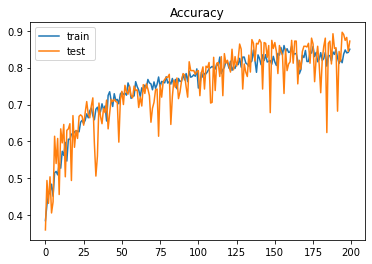

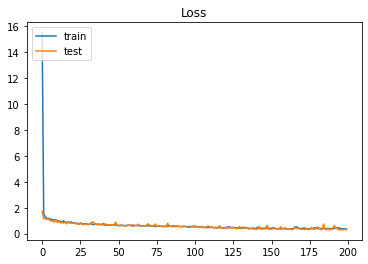

In [1013]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [1135]:
results = model.evaluate(x_train, y_train)

47/47 [==============================] - 0s 707us/step - loss: 0.3809 - accuracy: 0.8513


## Performance Evaluation

In [1136]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'Naive Bayes', 
              'Decision Tree','AdaBoost',
             'GradientBoost','Light Gradient Boost',
              'XgBoost', 'Cat Boost',
              'Voting', 'Stacking',
              'MLP'
             ],
    'Score': [lr_acc, knn_test_acc, svc_test_acc, nb_acc, 
              dtc_test_acc, ada_test_acc, gbc_test_acc, 
              lgb_test_acc, xgb_test_acc, cat_test_acc,
              vot_test_acc, stk_test_acc, results[1]
             ]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
11,Stacking,0.974000
2,SVC,0.970000
10,Voting,0.934000
9,Cat Boost,0.930000
5,AdaBoost,0.918000
8,XgBoost,0.918000
1,KNN,0.910000
6,GradientBoost,0.904000
7,Light Gradient Boost,0.900000
12,MLP,0.851333


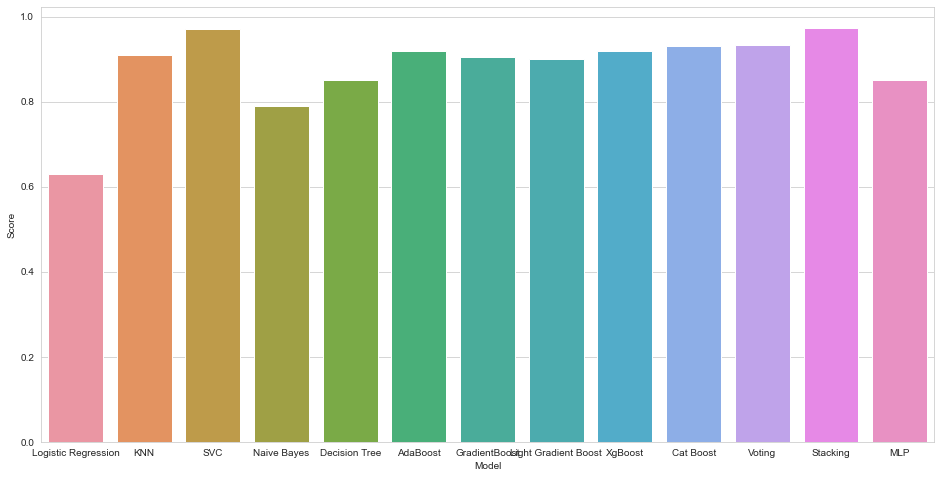

In [1138]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'])
plt.show()